<a href="https://colab.research.google.com/github/sbutori/autoestudo-semana-09/blob/main/Predicao_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Autoestudo: predição de uma série temporal

Antes de executar o notebook, faça o download do dataset Kaggle `train.csv` em [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) e realize o upload do mesmo na raiz do Colab.

# Desenvolvimento do Modelo de Predição utilizando Prophet

## Importar as bibliotecas

In [5]:
import pandas as pd
from prophet import Prophet

## Carregar e preparar os dados

In [6]:
# Carregar o dataset de treinamento
train = pd.read_csv('train.csv')

# Filtrar os dados para uma loja e tipo de produto
store = 1
family = 'AUTOMOTIVE'
df = train[(train['store_nbr'] == store) & (train['family'] == family)]

# Preparar os dados para o Prophet
df_prophet = df[['date', 'sales']].copy()
df_prophet.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y-%m-%d')

## Treinar o modelo Prophet

In [7]:
# Instanciar o modelo
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1oaec5vj/249pysei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1oaec5vj/bwlew3y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67317', 'data', 'file=/tmp/tmp1oaec5vj/249pysei.json', 'init=/tmp/tmp1oaec5vj/bwlew3y5.json', 'output', 'file=/tmp/tmp1oaec5vj/prophet_modelcqq4a0d8/prophet_model-20241006205113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:51:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:51:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:

## Fazer previsões

In [8]:
# Criar dataframe para previsões futuras
future = model.make_future_dataframe(periods=16)

# Fazer previsões
forecast = model.predict(future)

## Visualizar os resultados

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


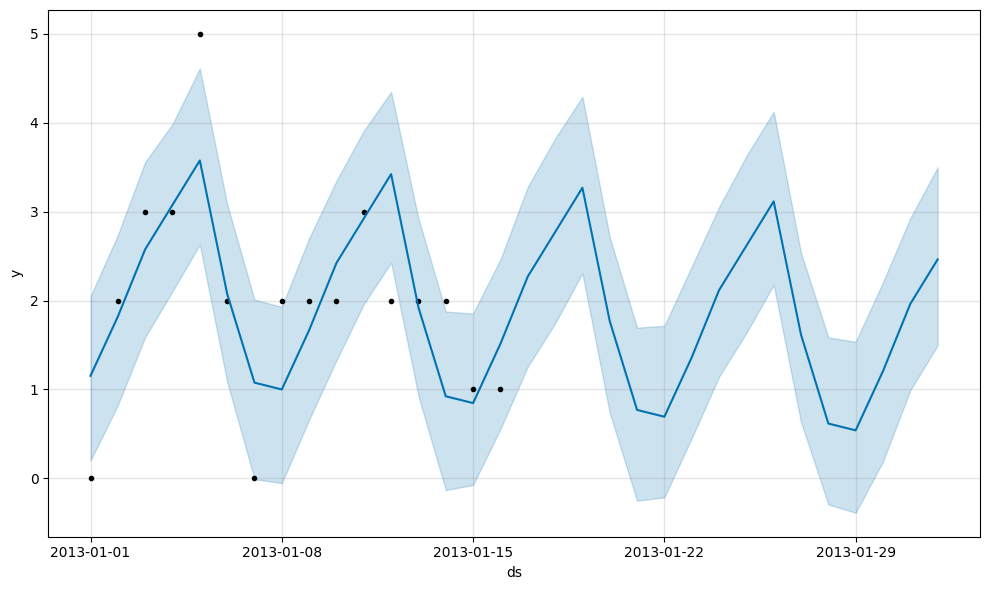

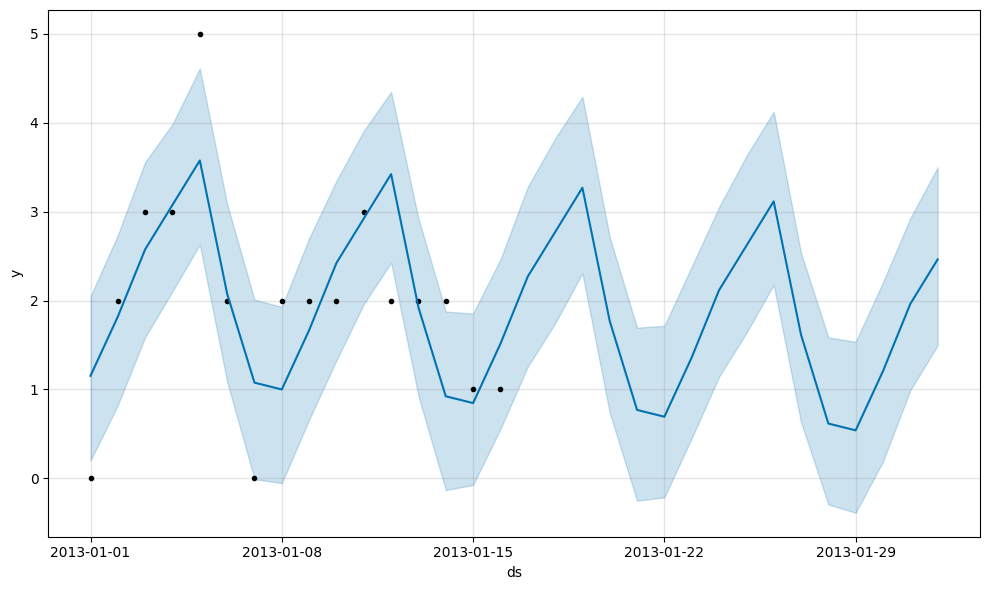

In [9]:
# Plotar a previsão
model.plot(forecast)

# Desenvolvimento do Modelo de Predição utilizando LSTM

## Importar as bibliotecas necessárias

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

## Carregar e preparar os dados

In [11]:
# Carregar o dataset de treinamento
train = pd.read_csv('train.csv')

# Filtrar os dados para uma loja e tipo de produto
store = 1
family = 'AUTOMOTIVE'
df = train[(train['store_nbr'] == store) & (train['family'] == family)]

# Ordenar por data
df = df.sort_values('date')

# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Usar apenas a coluna de vendas
sales_data = df['sales'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_data)

## Criar sequências de treinamento

In [12]:
# Definir o número de passos de tempo
time_steps = 4

# Função para criar série temporal
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(sales_scaled, time_steps)

# Remodelar X para o formato [amostras, passos de tempo, características]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [30]:
# Definir o modelo
model = Sequential([
    Input(shape=(time_steps, 1)),
    LSTM(50, return_sequences=True),
    Dense(1)]
)

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0608  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0605 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0514 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0360 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0395 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0342 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0406 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0341 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300 
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0349 
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━

In [18]:
# Fazer previsões no conjunto de treinamento
train_predict = model.predict(X)

# Desnormalizar as previsões
train_predict = scaler.inverse_transform(train_predict)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


# Apresentação de Métrica de Erro e Justificativa da Escolha

Para avaliar o desempenho dos modelos, vamos usar a métrica Mean Absolute Error (MAE).

Essa métrica é a média dos erros absolutos entre as previsões e os valores reais.



In [19]:
from sklearn.metrics import mean_absolute_error

## Comparar as previsões com os dados reais


### Cálculo do MAE para o modelo Prophet

In [21]:
# Obter as previsões correspondentes ao conjunto de treinamento
forecast_train = forecast.iloc[:len(df_prophet)]

In [22]:
mae_prophet = mean_absolute_error(df_prophet['y'], forecast_train['yhat'])

print(f'MAE do modelo Prophet: {mae_prophet}')

MAE do modelo Prophet: 0.5929323809454802


### Cálculo do MAE para o modelo LSTM

In [31]:
mae_lstm = mean_absolute_error(y_actual, train_predict)

print(f'MAE do modelo LSTM: {mae_lstm}')

MAE do modelo LSTM: 1.333250163615435


## Justificativa da Escolha do MAE

A escolha do MAE como métrica de erro é justificada por ser mais simples e menos sensível a outliers do que outras métricas.

De acordo com Hyndman e Koehler, 2006, o MAE é menos sensível a outliers do que o Mean Squared Error (MSE) e, se todas as séries trabalhadas estiverem na mesma escala, pode ser preferível a métricas como Mean Absolute Scaled Error (MASE) por razões de simplicidade.

**Referência:**

HYNDMAN, R. J.; KOEHLER, A. B. Another look at measures of forecast accuracy. International Journal of Forecasting, v. 22, n. 4, p. 679–688, out. 2006. Disponível em: <https://robjhyndman.com/publications/another-look-at-measures-of-forecast-accuracy/>

## Conclusão

Ao comparar os valores de MAE obtidos pelos dois modelos, podemos avaliar que o modelo Prophet teve um desempenho significativamente melhor na previsão das vendas do que o modelo LSTM.

Isso pode indicar a necessidade de ajustes no modelo LSTM ou, eventualmente, que essa abordagem não é útil para o problema atual de previsão de séries temporais.